In [1]:
import os, sys
# Reference: https://stackoverflow.com/questions/34478398/import-local-function-from-a-module-housed-in-another-directory-with-relative-im
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from data.generated.generated_data import get_large_num_features_dataset
import common_grid_search_analysis
import DecisionTrees.common_decision_tree as common_decision_tree
import TrainingCurves

import numpy as np
import pandas  as pd
from sklearn import tree
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import joblib

In [2]:
PLOT_PREFIX = "Figures/LARGE_NUM_FEATURES_DT_TEST_"
GLOBAL_FIG_COUNTER = 0

GS_FILE_NAME_PREFIX = "Analysis_Data/LARGE_NUM_FEATURES_DECISION_TREE"

In [3]:
# Load Data
X_train, X_test, y_train, y_test = get_large_num_features_dataset()
num_features = X_train.shape[1]

In [4]:
# Start with Learning Curve on Default Classifier
train_sizes, train_scores, test_scores, fit_times = TrainingCurves.perform_learning_curve(tree.DecisionTreeClassifier(criterion='gini'), X_train, y_train, "accuracy")

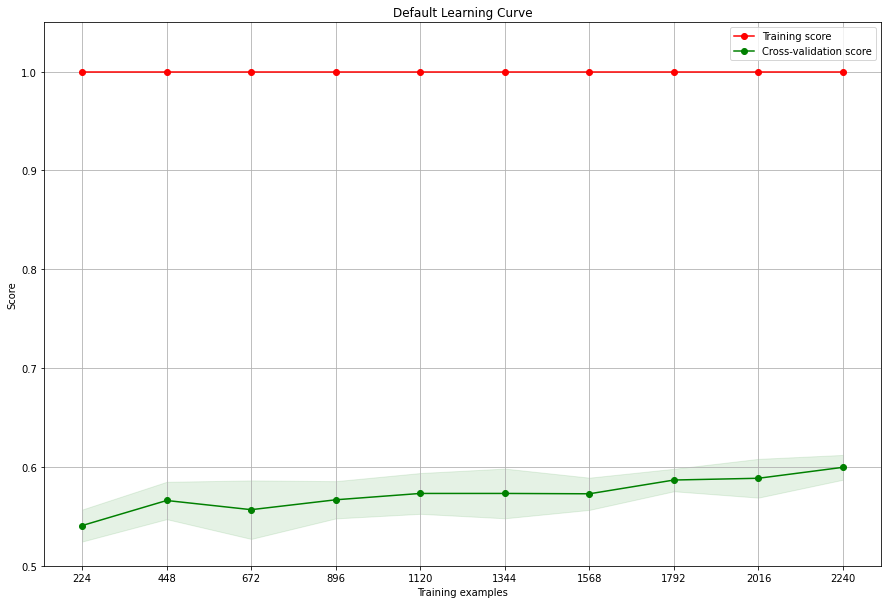

In [5]:
ylim=(0.5, 1.05)
TrainingCurves.plot_learning_curve(train_scores, test_scores, train_sizes, "Default Learning Curve", ylim=ylim)

In [6]:
ccp_alpha = np.arange(0.0, 0.005, 0.0001)

criterion = ['gini', 'entropy']
min_samples_split = [i for i in range(2, 200, 5)]
min_samples_leaf = [i for i in range(1, 200, 5)]
max_depth = [i for i in range(1, 50, 2)]
num_features = X_train.shape[1]
max_features = [i for i in range(num_features+1)]

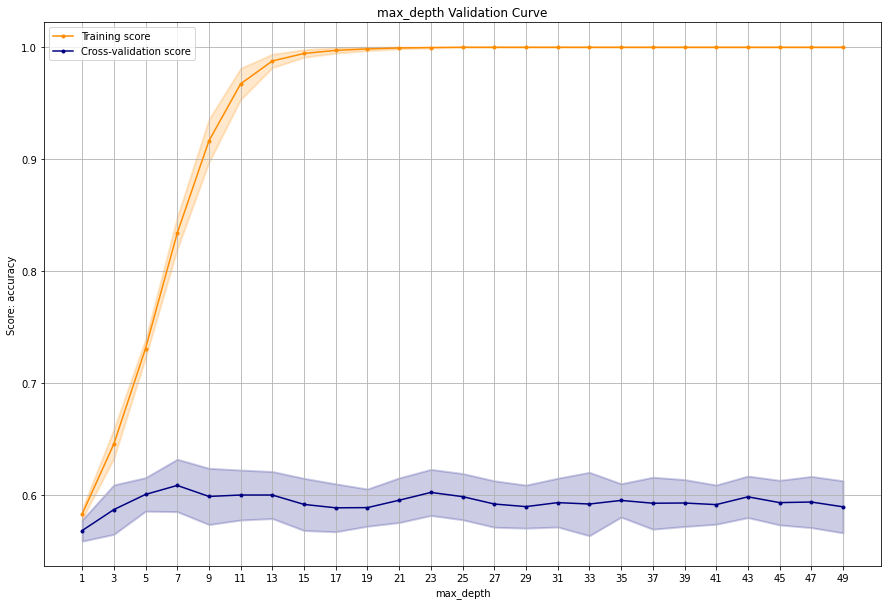

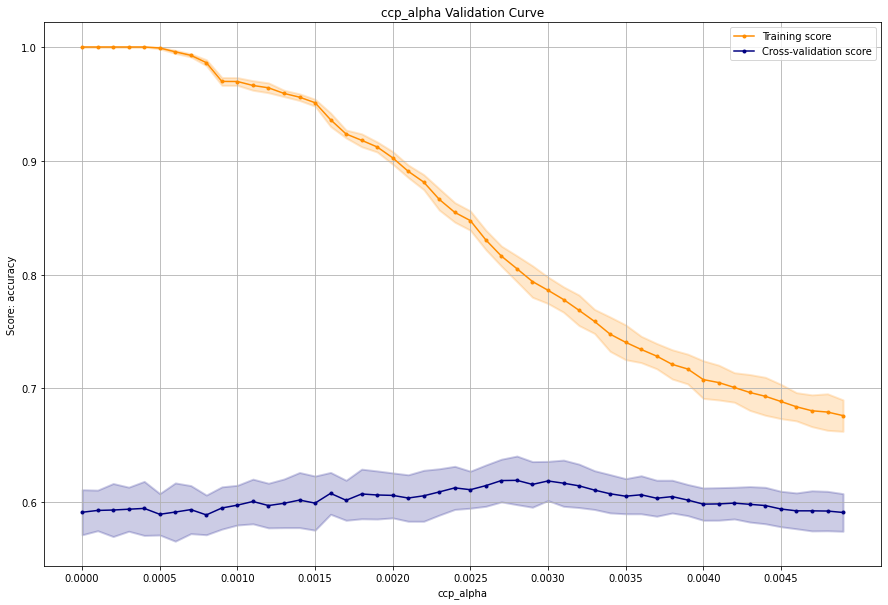

In [7]:
train_scores_mean, train_scores_std, test_scores_mean, test_scores_std = \
TrainingCurves.perform_validation_curve(tree.DecisionTreeClassifier(), X_train, y_train, "max_depth", max_depth, 'accuracy', cv=TrainingCurves.get_cv())
TrainingCurves.plot_validation_curve(train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, "max_depth", max_depth, title="max_depth Validation Curve", scoring="accuracy", tick_spacing=1)

train_scores_mean, train_scores_std, test_scores_mean, test_scores_std = \
TrainingCurves.perform_validation_curve(tree.DecisionTreeClassifier(), X_train, y_train, "ccp_alpha", ccp_alpha, 'accuracy', cv=TrainingCurves.get_cv())
TrainingCurves.plot_validation_curve(train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, "ccp_alpha", ccp_alpha, title="ccp_alpha Validation Curve", scoring="accuracy", tick_spacing=5)

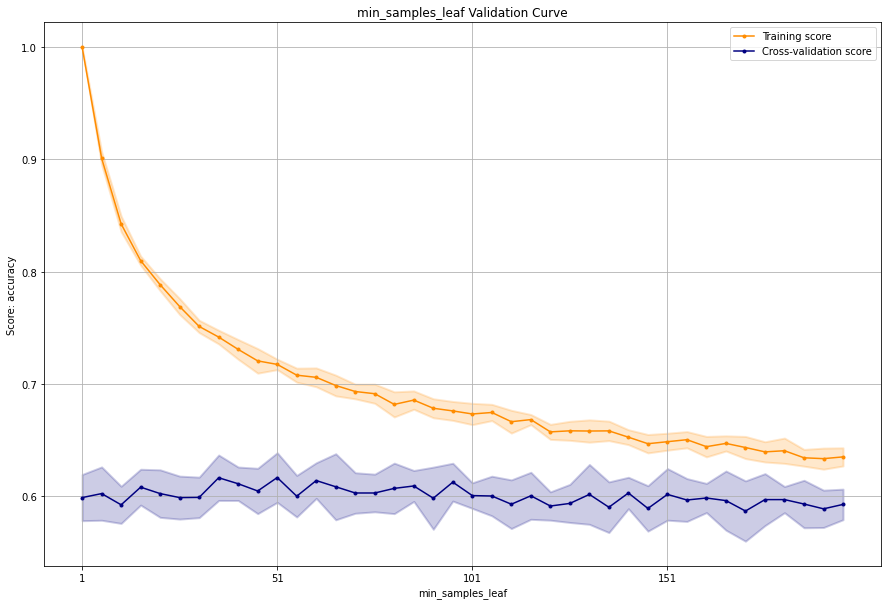

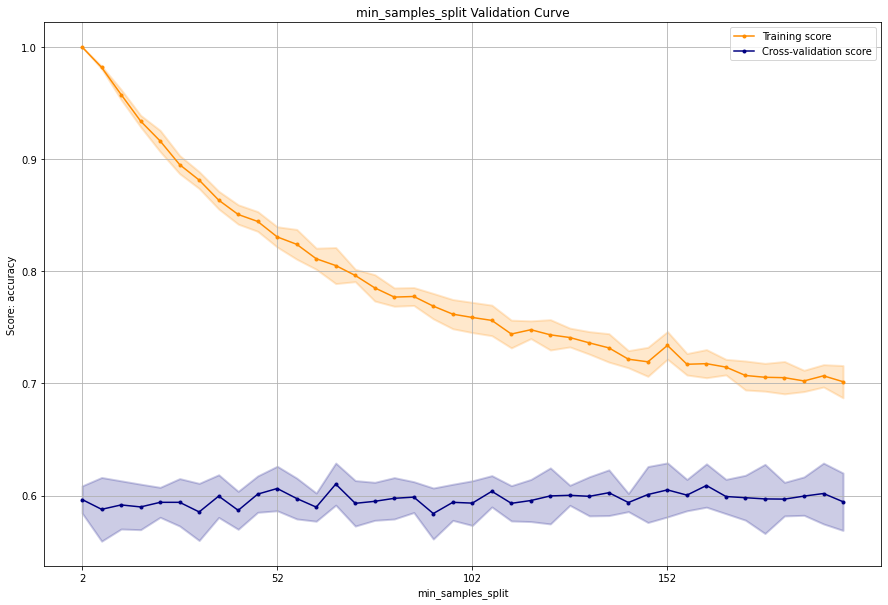

In [8]:
test_parameters = {'criterion': 'gini', 'max_features': num_features//2, 'max_depth': 100, 'ccp_alpha': 0.0001}
test_parameters={}
train_scores_mean, train_scores_std, test_scores_mean, test_scores_std = \
TrainingCurves.perform_validation_curve(tree.DecisionTreeClassifier(**test_parameters), X_train, y_train, "min_samples_leaf", min_samples_leaf, 'accuracy', cv=TrainingCurves.get_cv())
TrainingCurves.plot_validation_curve(train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, "min_samples_leaf", min_samples_leaf, title="min_samples_leaf Validation Curve", scoring="accuracy", tick_spacing=10)

train_scores_mean, train_scores_std, test_scores_mean, test_scores_std = \
TrainingCurves.perform_validation_curve(tree.DecisionTreeClassifier(**test_parameters), X_train, y_train, "min_samples_split", min_samples_split, 'accuracy', cv=TrainingCurves.get_cv())
TrainingCurves.plot_validation_curve(train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, "min_samples_split", min_samples_split, title="min_samples_split Validation Curve", scoring="accuracy", tick_spacing=10)



In [ ]:
ccp_alpha = np.arange(0.0, 0.0062, 0.0002)

criterion = ['gini', 'entropy']
min_samples_split = [i for i in range(2, 50, 2)]
min_samples_leaf = [i for i in range(1, 50, 2)]
max_depth = [i for i in range(1, 60, 2)]
max_features = [i for i in range(num_features+1)]

parameters = {'criterion': criterion, 'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf, 'max_features': max_features}

parameters = {'max_depth': max_depth, 'min_samples_leaf': min_samples_leaf, 'min_samples_split': min_samples_split, 'ccp_alpha': ccp_alpha}

gs = common_decision_tree.perform_grid_search(parameters, X_train, y_train, scoring='accuracy', GS_FILE_NAME_PREFIX= GS_FILE_NAME_PREFIX)

gs_results = gs

Grid Search Will be Saved to  Analysis_Data/GENERATED1_DECISION_TREE_max_depth_1-59_min_samples_leaf_1-49_min_samples_split_2-48_ccp_alpha_0.0-0.006.pickle
Fitting 5 folds for each of 558000 candidates, totalling 2790000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1931s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0252s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0546s.) Setting batch_size=8.
[Parallel(n_jobs=-1)]: Done  78 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 127 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0813s.) Setting batch_size=16.
[Parallel(n_jobs=-1)]: Done 216 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Batch comp

In [ ]:
unused_params_values = {'min_samples_leaf': min(min_samples_leaf), 'min_samples_split': min(min_samples_split), 'max_features': max(max_features)}

common_grid_search_analysis.plot_grid_search_model_complexity(gs_results, PLOT_PREFIX, unused_params_value_dict=unused_params_values)


In [ ]:
common_grid_search_analysis.plot_grid_search_training_times(gs_results, PLOT_PREFIX)
